<a href="https://colab.research.google.com/github/SykoTheKiD/NeuralPredictTutorial/blob/master/MLSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

## Introduction to Artificial Neural Networks

This tutorial covers:
- What is an ANN?
- How to build one?
- How to train one?
- How do I use the trained ANN?

### What is an ANN?

Before I begin with the introduction, I highly recommend 3B1B's series on Neural Networks as they are very in depth and intuitive in their explainations of what and how a ANN works.

[3b1b Neural Network Series](https://https://www.youtube.com/watch?v=aircAruvnKk)

A neural network is essentially a weighted sum inference algorithm. It in as input a predefined set of numbers and then assigns a `weight` to each number and outputs another number based on the total weight calculation.

![Image of a Neuron (from KDNuggets)](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png)

A series of these neurons make one layer in a neural network and a series of layers make a network.

![Neural Network from KDNuggets](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-4-19-50-am.png)

Repeated stacking of these layers is called `Deep Learning`


### The Project

In this tutorial we will use a neural network to perform a simple task. Given an array size *5* with numbers who continuously range from *n* to *m* (*n* and *m* range from -100 to 100) one number from that continuous range is missing. The neural network will try and figure it out.

While this problem is best solved using a non machine learning algorithm this is still a good problem to try and solve to learn the basics of neural networks for the following reasons:

- We do not need to worry about collecting data as we can generate infinitely many data points
- We can manipulate the dimensions of our data easily to fit our problem
- The network will be easy to train

### The code

First to begin we will import all the packages needed to develop the network

In [0]:
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import pandas as pd
import random as rd
import numpy as np

from keras.utils.vis_utils import plot_model

These are constants that will be referenced throughout the project.

Constants such as `BATCH_SIZE`, `NUM_EPOCHS`, `TRAIN_SIZE`, `TEST_SIZE` and `VALIDATION_SIZE` are called **hyperparameters**. These are parameters that do not change during training.

In [0]:
DATASET_SIZE = 1000000
MAX_RANGE = 100
MIN_RANGE = -100
BATCH_SIZE = 25
TEST_SIZE = 0.2
VALIDATION_SIZE=0.33
NUM_EPOCHS = 50
ARR_SIZE = 5

### Generating our dataset

We will generate our dataset  as described above

In [34]:
%time

dataset = []

for _ in range(DATASET_SIZE):
    tmp_inp = []
    start_int = rd.randint(MIN_RANGE, MAX_RANGE)
    
    for i in range(ARR_SIZE + 1):
        tmp_inp.append(start_int)
        start_int = start_int + 1

    rand_index = rd.randint(0, ARR_SIZE)
    output = tmp_inp.pop(rand_index)
    rd.shuffle(tmp_inp)
    tmp_inp.append(output)
    dataset.append(tmp_inp)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


We will convert our list of lists into a Pandas DataFrame. Panda DataFrames are easier to use and feed into a neural network

In [0]:
df = pd.DataFrame(dataset, columns=['v1', 'v2', 'v3', 'v4', 'v5','out'])

In [36]:
df.head()

,v1,v2,v3,v4,v5,out
0,-84,-89,-85,-88,-87,-86
1,43,40,42,44,45,41
2,59,58,56,57,60,61
3,58,56,55,54,59,57
4,82,86,85,83,81,84


Now we can split our data into inputs and outputs

In [0]:
X, y = df.iloc[:, 0:5].values, df.iloc[:, 5].values 

A ML algorithm needs two types of datasets, a training set and a test set

A **training set** is what the network uses to learn and understand the data

A **test set** is what the network uses to see if it understood the data properly


We will split our **X, y** data into train and test sets

In [0]:
# Split training / val / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

### Creating our Neural Network

Now we can define our neural network

In [0]:
model = Sequential()
model.add(Dense(16, input_dim=ARR_SIZE, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total para

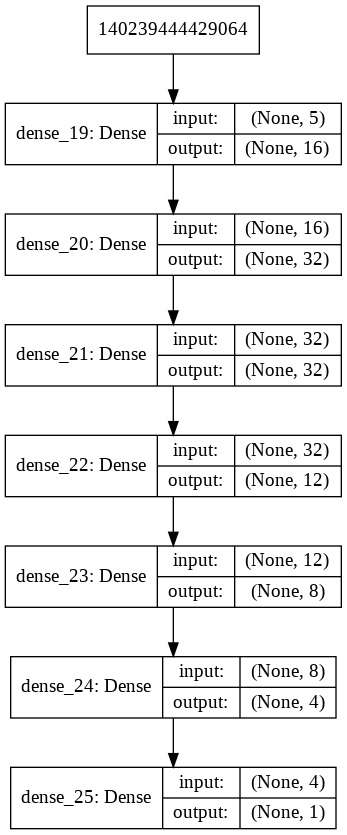

In [41]:
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=[metrics.mae])

In [24]:
%time
model.fit(X_train, y_train, validation_split=VALIDATION_SIZE, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Train on 536000 samples, validate on 264000 samples
Epoch 1/50
536000/536000 [==============================] - 165s 307us/step - loss: 12.2304 - mean_absolute_error: 1.9745 - val_loss: 4.3615 - val_mean_absolute_error: 1.8072
Epoch 2/50
536000/536000 [==============================] - 166s 310us/step - loss: 4.5602 - mean_absolute_error: 1.8344 - val_loss: 4.8832 - val_mean_absolute_error: 1.8760
Epoch 3/50
536000/536000 [==============================] - 166s 310us/step - loss: 4.5152 - mean_absolute_error: 1.8182 - val_loss: 4.1637 - val_mean_absolute_error: 1.7696
Epoch 4/50
536000/536000 [==============================] - 166s 309us/step - loss: 4.4405 - mean_absolute_error: 1.7867 - val_loss: 4.0805 - val_mean_absolute_error: 1.7384
Epoch 5/50
536000/536000 [==============================] - 165s 307us/step - loss: 4.3312 - mean_absolute_error: 1.7399 - val_loss: 4.8874 - val_mean_absolute_error: 1.8218
Epoch 6/50
536000/536000 [==============================] - 176s 329us/step -

KeyboardInterrupt: ignored

In [0]:
scores = model.evaluate(X_test, y_test)

In [0]:
scores[1]

In [0]:
model.predict(np.array([[1,2,3,6,5]]))